# Introducing the dataset of donors for a particular event

### Data Set Information:

**This is a dataset collected from web and contains the following information**

- The full name of the persons
- Their employment details
- City, State and zip code information
- Amount they have contributed


### Possible Business Question

**Is their any relationship between their employment details and city with the amount they have donated?**

### OBJECTIVE 

**The objective of this project is to carry out Exploratory Data Analysis for the above mentioned business question**

### Step 1- Data cleansing
- Deleted the extraneous columns
- Changed the variables to correct data types
- Cleansed the Employer category and replaced the similar terms into one category

In [366]:
#Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [367]:
!ls -lrt

total 123128
-rw-r--r-- 1 karis 197609    122006 Mar 10  2018 donors2008.csv
-rw-r--r-- 1 karis 197609   2867208 May 20 20:39 credit_card_default.csv
-rw-r--r-- 1 karis 197609 122899180 May 24 18:04 U.S._Chronic_Disease_Indicators.csv
-rw-r--r-- 1 karis 197609     36305 May 26 09:32 ch2_2_credit_card_default.ipynb
-rw-r--r-- 1 karis 197609    151528 May 27 02:41 donor_data_EDA.ipynb


In [368]:
#Changes the encoding as it threw error with the default encoding
donor_df=pd.read_csv('donors2008.csv',encoding = "ISO-8859-1")

In [369]:
donor_df.head()

,LastName,FirstName,Employer,City,State,Zip,Amount,FIELD8
0,Aaron,Eugene,State Department,Dulles,VA,20189,500.0,NaN
1,Abadi,Barbara,Abadi & Co.,New York,NY,10021,200.0,NaN
2,Adamany,Anthony,Retired,Rockford,IL,61103,500.0,NaN
3,Adams,Lorraine,Self,New York,NY,10026,200.0,NaN
4,Adams,Marion,None,Exeter,NH,03833,100.0,NaN


In [370]:
#Checking the rows and columns of the dataset
donor_df.shape

(1776, 8)

In [371]:
#Counting the number observations for each variable
donor_df.count()

LastName     1776
FirstName    1776
Employer     1743
City         1776
State        1776
Zip          1776
Amount       1776
FIELD8          0
dtype: int64

In [372]:
# Deleted extraneous column
del donor_df['FIELD8']
donor_df.head()

,LastName,FirstName,Employer,City,State,Zip,Amount
0,Aaron,Eugene,State Department,Dulles,VA,20189,500.0
1,Abadi,Barbara,Abadi & Co.,New York,NY,10021,200.0
2,Adamany,Anthony,Retired,Rockford,IL,61103,500.0
3,Adams,Lorraine,Self,New York,NY,10026,200.0
4,Adams,Marion,None,Exeter,NH,03833,100.0


In [373]:
#Checking the datatypes
donor_df.dtypes

LastName      object
FirstName     object
Employer      object
City          object
State         object
Zip           object
Amount       float64
dtype: object

In [374]:
# Use pd.to_numeric() method to convert the datatype of the Amount column
donor_df['Amount'] = pd.to_numeric(donor_df['Amount'])
donor_df['Amount'].dtype

dtype('float64')

In [375]:
# Display an overview of the Employers column
donor_df['Employer'].value_counts()

None                                     249
Self                                     241
Retired                                  126
Self Employed                             39
Self-Employed                             34
Google                                     6
Unemployed                                 4
Not Employed                               4
Bank Of America                            3
Social Security Administration             3
University of California                   3
United Health Group                        2
Covington & Burling                        2
Google, Inc.                               2
UCLA                                       2
Sidley Austin LLP                          2
Harvard University                         2
Mayer Brown                                2
University of Michigan                     2
University of Washington                   2
University Of Michigan                     2
ExxonMobil                                 2
Ariel Inve

In [376]:
# Cleansed the Employer category and replaced the similar terms into one category
donor_df['Employer'] = donor_df['Employer'].replace({'Self Employed':'Self-Employed', 
                                                     'Self': 'Self-Employed',
                                                     'Not Employed': 'Unemployed',
                                                    'None':'Not Disclosed'})


In [377]:
# Verify clean-up. 
donor_df['Employer'].value_counts()

Self-Employed                            314
Not Disclosed                            249
Retired                                  126
Unemployed                                 8
Google                                     6
Bank Of America                            3
University of California                   3
Social Security Administration             3
Sidley Austin LLP                          2
UCLA                                       2
Rainey Cluss LLC                           2
Skadden, Arps                              2
Harvard University                         2
United Health Group                        2
Davis Polk & Wardwell                      2
University Of Michigan                     2
Covington & Burling                        2
University Hospital                        2
Google, Inc.                               2
CSC                                        2
Ariel Investments                          2
Jones Day                                  2
ExxonMobil

### Step 2- Data exploration
- Understand Employer's contribution
- Understand contribution based on State


In [378]:
#Calculated the sum donated by each employer
employer_details=donor_df.groupby(['Employer']).sum()['Amount']

#changed the above 'employer_details' float variable to dataframe
employer_details=pd.DataFrame({"Total Amount":employer_details})
employer_details=employer_details.reset_index(level=['Employer'])
employer_details['Total Amount'].describe().round()

count      1008.0
mean       1107.0
std        7317.0
min           5.0
25%         200.0
50%         250.0
75%         500.0
max      197556.0
Name: Total Amount, dtype: float64

Text(0.5,1,'Box Plot for Total Amount')

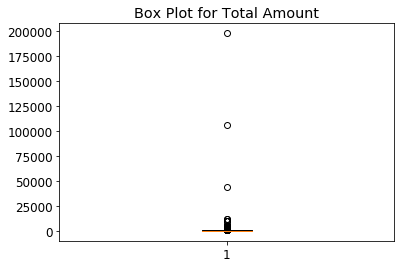

In [379]:
#Is the max amount really an outlier?
plt.boxplot(x=employer_details['Total Amount'])
plt.title('Box Plot for Total Amount')

In [380]:
#Split the dataset into two halves for analysis
#1. Containing only the observations with distinct employer information
#2. No employer information

no_employer_df=employer_details.loc[employer_details['Employer'].isin(['Self-Employed','Not Disclosed','Retired','Unemployed'])]
no_employer_df

,Employer,Total Amount
593,Not Disclosed,105645.44
705,Retired,43875.00
753,Self-Employed,197556.00
909,Unemployed,11950.00


Text(0.5,1,'Contribution made by persons with no distinct employment information')

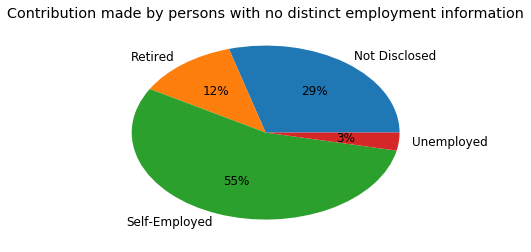

In [381]:
plt.pie(x=no_employer_df['Total Amount'],labels=no_employer_df['Employer'],autopct='%.0f%%')

plt.title('Contribution made by persons with no distinct employment information')

In [382]:
#Containing only the observations with distinct employer information
employer_df=employer_details.loc[~employer_details['Employer'].isin(['Self-Employed','Not Disclosed','Retired','Unemployed'])]
employer_df['Total Amount'].describe().round()

count     1004.0
mean       754.0
std       1523.0
min          5.0
25%        200.0
50%        250.0
75%        500.0
max      11450.0
Name: Total Amount, dtype: float64

Text(0.5,1,'Box Plot for Total Amount')

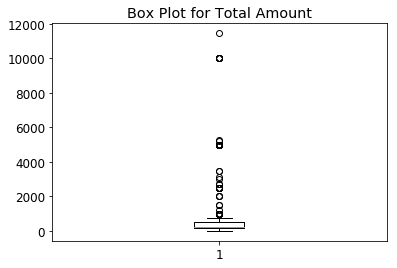

In [383]:
#Recheck the outliers after splitting
plt.boxplot(x=employer_df['Total Amount'])
plt.title('Box Plot for Total Amount')

In [384]:
#Considering the business question we cannot ignore these outliers,so, selecting all the employers who donated more than mean
top_employers_df=employer_df.loc[employer_df['Total Amount']>765]
top_employers_df.count()

Employer        154
Total Amount    154
dtype: int64

Text(0.5,1,'Top 30 Employers')

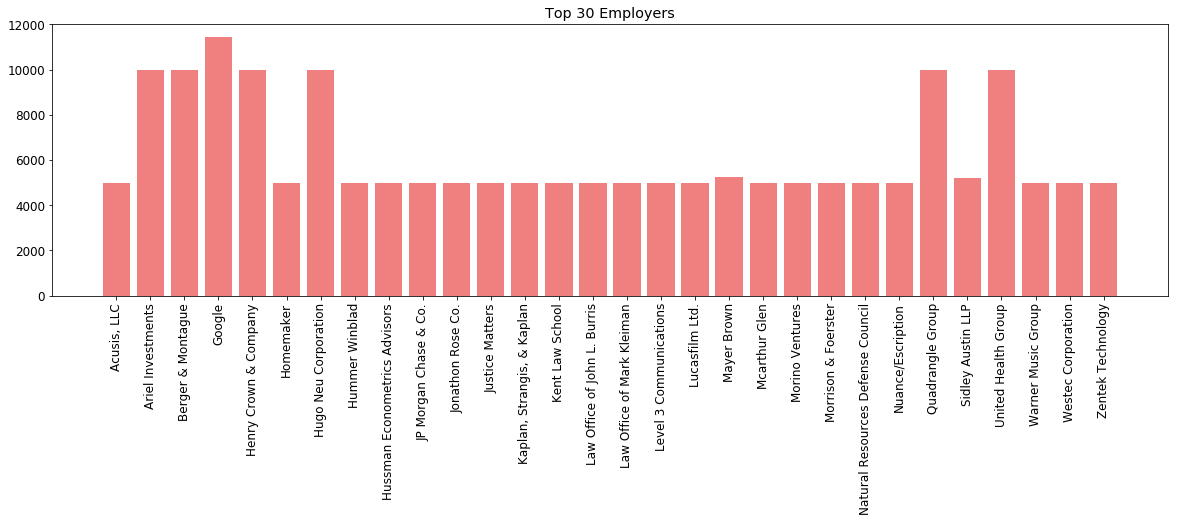

In [395]:
top_30_df=top_employers_df.sort_values(['Total Amount'],ascending=[False]).head(30)

plt.figure(figsize=(20, 5))
x_axis=top_30_df['Employer']
y_axis=top_30_df['Total Amount']
plt.bar(x_axis,y_axis, color='lightcoral')

# tick_locations=[value for value in np.arange(25)]
plt.xticks(rotation=90)

plt.title("Top 30 Employers")

**From initial analysis, it can be seen that Google,Self-Employed & persons who did Not-Disclose employment details donated the highest amount**
**Further analysis needed with the dataframe where emplyoment details are not distinct** 

In [386]:
#Calculated the sum donated based on state
donation_bystate=donor_df.groupby(['State']).sum()['Amount']

#changed the above 'donation_bystate' float variable to dataframe
donation_bystate_df=pd.DataFrame({"Total Amount":donation_bystate})
donation_bystate_df=donation_bystate_df.reset_index(level=['State'])
donation_bystate_df['Total Amount'].describe().round()

count        53.0
mean      22093.0
std       45535.0
min         100.0
25%        1700.0
50%        3625.0
75%       21575.0
max      250796.0
Name: Total Amount, dtype: float64

Text(0.5,1,'Box Plot for Total Amount by State')

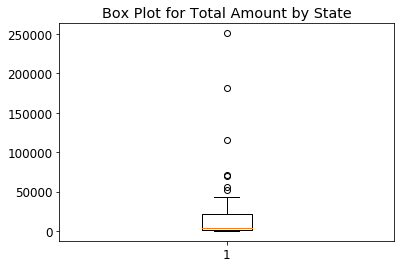

In [387]:
#Check outliers?
plt.boxplot(x=donation_bystate_df['Total Amount'])
plt.title('Box Plot for Total Amount by State')

In [388]:
#Again,considering the business question we cannot ignore these outliers,however, we could have ignored the outliers below lower limit.
donation_bystate_df.count()

State           53
Total Amount    53
dtype: int64

Text(0.5,1,'Donation Amount by State')

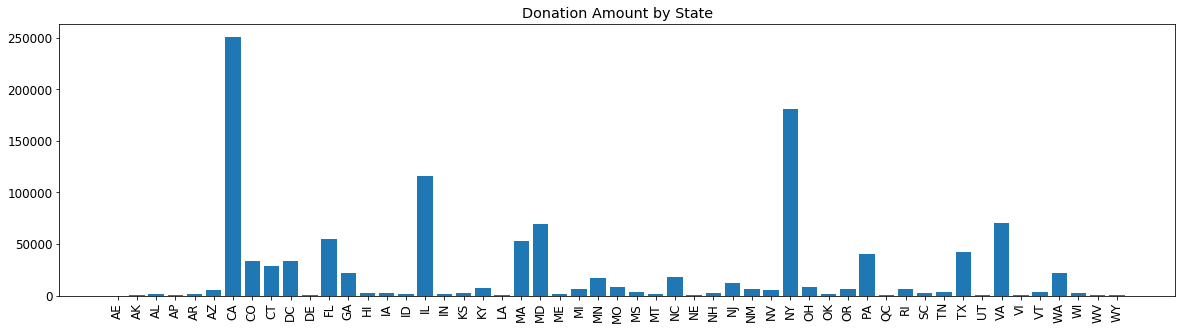

In [389]:

plt.figure(figsize=(20, 5))
x_axis=donation_bystate_df['State']
y_axis=donation_bystate_df['Total Amount']
plt.bar(x_axis,y_axis)

# tick_locations=[value for value in np.arange(25)]
plt.xticks(rotation=90)

plt.title("Donation Amount by State")

**Clearly, CA,NY and IL are top 3 states**

### EDA ANALYSIS and POSSIBLE CONCLUSION
- Highest contribution of around 200K is made by Self Employed persons which makes the dataset biased with a mean of 1107.00  dollars and standard deviation of 7317.00 dollars.  Also, many of them preferred not to disclose their employer’s information.
Due to this, split the dataset based on Employer’s information availability.
- However, further analysis needs to be carried out on "Not-Disclosed" & "Self-Employed" category for concrete conslusion.
- EDA analysis on donation by state was done, but for more better results, more analysis is required on State's and zip codes data and their relationship with Employer feature. 

**From initial analysis, Google,Self-Employed & persons who did not disclose employment details donated the highest amount**

**Top 3 states which donated the maximum ammount is CA, NY and IL**


